# Hurricane Analysis

#### Overview

Project Summart:

The provided Python code constitutes a comprehensive hurricane data analysis project. It encompasses functions to update and organize data on hurricane damages, create dictionaries of hurricane information, and derive valuable insights. The project offers capabilities such as counting affected areas, identifying the most affected region, determining the deadliest hurricane, categorizing hurricanes by mortality and damage severity, and pinpointing the hurricane with the highest damage. The code not only facilitates a detailed exploration of historical hurricane data but also provides a structured and systematic approach to extract meaningful patterns and statistics. This project is instrumental in gaining a nuanced understanding of the impact of hurricanes over the years, covering aspects ranging from affected regions to the socio-economic consequences of these natural disasters.


Function Overview:

The code includes a function (convert_damages_data) that updates a list of hurricane damages. It converts recorded damages from string to float values and retains "Damages not recorded" as is.
The damages are updated using a conversion dictionary for million (M) and billion (B) multipliers.
Hurricanes Dictionary:

Another function (create_dictionary) constructs a dictionary of hurricanes. The keys are hurricane names, and the values are dictionaries containing various data about each hurricane (e.g., Name, Month, Year, Max Sustained Wind, Areas Affected, Damage, Death).
Organizing by Year:

A function (create_year_dictionary) organizes the hurricanes into a new dictionary where the keys are years, and the values are lists containing dictionaries for each hurricane in that year.
Counting Affected Areas:

A function (count_affected_areas) counts how often each area is listed as an affected area across all hurricanes. The results are stored in a dictionary where keys are affected areas, and values are counts of occurrences.
Most Affected Area:

A function (most_affected_area) finds the area affected by the most hurricanes and how often it was hit. The result is printed, showing Central America as the most affected area with 9 occurrences.
Deadliest Hurricane:

A function (highest_mortality) identifies the hurricane that caused the greatest number of deaths and the death count. The result is printed, showing Hurricane Mitch in 1998 with 19,325 deaths.
Categorizing by Mortality:

A function (categorize_by_mortality) categorizes hurricanes based on mortality using a predefined scale. It returns a dictionary with mortality severity as the key.
Highest Damage Hurricane:

A function (highest_damage) finds the hurricane that caused the greatest damage and its total cost. The result is printed, showing Hurricane Katrina in 2005 with damages of $125 billion.
Categorizing by Damage:

A function (categorize_by_damage) categorizes hurricanes based on damage using a predefined scale. It returns a dictionary with damage severity as the key.
These functions provide insights into various aspects of the hurricane data, including damages, affected areas, mortality, and damage severity. The findings are presented in an organized and structured manner, making it easier to analyze and interpret the information.

Function that returns a new list of updated damages where the recorded data is converted to float values and the missing data is retained as `"Damages not recorded"`.

In [22]:
# damages (USD($)) of hurricanes
damages = ['Damages not recorded', '100M', 'Damages not recorded', '40M', '27.9M', '5M', 'Damages not recorded', '306M', '2M', '65.8M', '326M', '60.3M', '208M', '1.42B', '25.4M', 'Damages not recorded', '1.54B', '1.24B', '7.1B', '10B', '26.5B', '6.2B', '5.37B', '23.3B', '1.01B', '125B', '12B', '29.4B', '1.76B', '720M', '15.1B', '64.8B', '91.6B', '25.1B']

# 1
# Update Recorded Damages
def convert_damages_data(damages):
    """Convert damages data from string to float and return converted data as a list."""
    conversion = {"M": 1000000,
                "B": 1000000000}

    updated_damages = list()
    for damage in damages:
        if damage == "Damages not recorded":
          updated_damages.append(damage)
        if damage.find('M') != -1:
          updated_damages.append(float(damage[0:damage.find('M')])*conversion["M"])
        if damage.find('B') != -1:
          updated_damages.append(float(damage[0:damage.find('B')])*conversion["B"])
    return updated_damages

# test function by updating damages
updated_damages = convert_damages_data(damages)
print(updated_damages)

['Damages not recorded', 100000000.0, 'Damages not recorded', 40000000.0, 27900000.0, 5000000.0, 'Damages not recorded', 306000000.0, 2000000.0, 65800000.0, 326000000.0, 60300000.0, 208000000.0, 1420000000.0, 25400000.0, 'Damages not recorded', 1540000000.0, 1240000000.0, 7100000000.0, 10000000000.0, 26500000000.0, 6200000000.0, 5370000000.0, 23300000000.0, 1010000000.0, 125000000000.0, 12000000000.0, 29400000000.0, 1760000000.0, 720000000.0, 15100000000.0, 64800000000.0, 91600000000.0, 25100000000.0]


Write a function that constructs a dictionary made out of the lists, where the keys of the dictionary are the names of the hurricanes, and the values are dictionaries themselves containing a key for each piece of data (`Name`, `Month`, `Year`, `Max Sustained Wind`, `Areas Affected`, `Damage`, `Death`) about the hurricane.

In [23]:
# names of hurricanes
names = ['Cuba I', 'San Felipe II Okeechobee', 'Bahamas', 'Cuba II', 'CubaBrownsville', 'Tampico', 'Labor Day', 'New England', 'Carol', 'Janet', 'Carla', 'Hattie', 'Beulah', 'Camille', 'Edith', 'Anita', 'David', 'Allen', 'Gilbert', 'Hugo', 'Andrew', 'Mitch', 'Isabel', 'Ivan', 'Emily', 'Katrina', 'Rita', 'Wilma', 'Dean', 'Felix', 'Matthew', 'Irma', 'Maria', 'Michael']

# months of hurricanes
months = ['October', 'September', 'September', 'November', 'August', 'September', 'September', 'September', 'September', 'September', 'September', 'October', 'September', 'August', 'September', 'September', 'August', 'August', 'September', 'September', 'August', 'October', 'September', 'September', 'July', 'August', 'September', 'October', 'August', 'September', 'October', 'September', 'September', 'October']

# years of hurricanes
years = [1924, 1928, 1932, 1932, 1933, 1933, 1935, 1938, 1953, 1955, 1961, 1961, 1967, 1969, 1971, 1977, 1979, 1980, 1988, 1989, 1992, 1998, 2003, 2004, 2005, 2005, 2005, 2005, 2007, 2007, 2016, 2017, 2017, 2018]

# maximum sustained winds (mph) of hurricanes
max_sustained_winds = [165, 160, 160, 175, 160, 160, 185, 160, 160, 175, 175, 160, 160, 175, 160, 175, 175, 190, 185, 160, 175, 180, 165, 165, 160, 175, 180, 185, 175, 175, 165, 180, 175, 160]

# areas affected by each hurricane
areas_affected = [['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], ['The Bahamas', 'Northeastern United States'], ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], ['The Bahamas', 'Cuba', 'Florida', 'Texas', 'Tamaulipas'], ['Jamaica', 'Yucatn Peninsula'], ['The Bahamas', 'Florida', 'Georgia', 'The Carolinas', 'Virginia'], ['Southeastern United States', 'Northeastern United States', 'Southwestern Quebec'], ['Bermuda', 'New England', 'Atlantic Canada'], ['Lesser Antilles', 'Central America'], ['Texas', 'Louisiana', 'Midwestern United States'], ['Central America'], ['The Caribbean', 'Mexico', 'Texas'], ['Cuba', 'United States Gulf Coast'], ['The Caribbean', 'Central America', 'Mexico', 'United States Gulf Coast'], ['Mexico'], ['The Caribbean', 'United States East coast'], ['The Caribbean', 'Yucatn Peninsula', 'Mexico', 'South Texas'], ['Jamaica', 'Venezuela', 'Central America', 'Hispaniola', 'Mexico'], ['The Caribbean', 'United States East Coast'], ['The Bahamas', 'Florida', 'United States Gulf Coast'], ['Central America', 'Yucatn Peninsula', 'South Florida'], ['Greater Antilles', 'Bahamas', 'Eastern United States', 'Ontario'], ['The Caribbean', 'Venezuela', 'United States Gulf Coast'], ['Windward Islands', 'Jamaica', 'Mexico', 'Texas'], ['Bahamas', 'United States Gulf Coast'], ['Cuba', 'United States Gulf Coast'], ['Greater Antilles', 'Central America', 'Florida'], ['The Caribbean', 'Central America'], ['Nicaragua', 'Honduras'], ['Antilles', 'Venezuela', 'Colombia', 'United States East Coast', 'Atlantic Canada'], ['Cape Verde', 'The Caribbean', 'British Virgin Islands', 'U.S. Virgin Islands', 'Cuba', 'Florida'], ['Lesser Antilles', 'Virgin Islands', 'Puerto Rico', 'Dominican Republic', 'Turks and Caicos Islands'], ['Central America', 'United States Gulf Coast (especially Florida Panhandle)']]

# damages (USD($)) of hurricanes
damages = ['Damages not recorded', '100M', 'Damages not recorded', '40M', '27.9M', '5M', 'Damages not recorded', '306M', '2M', '65.8M', '326M', '60.3M', '208M', '1.42B', '25.4M', 'Damages not recorded', '1.54B', '1.24B', '7.1B', '10B', '26.5B', '6.2B', '5.37B', '23.3B', '1.01B', '125B', '12B', '29.4B', '1.76B', '720M', '15.1B', '64.8B', '91.6B', '25.1B']

# deaths for each hurricane
deaths = [90,4000,16,3103,179,184,408,682,5,1023,43,319,688,259,37,11,2068,269,318,107,65,19325,51,124,17,1836,125,87,45,133,603,138,3057,74]

# 2
def create_dictionary(names, months, years, max_sustained_winds, areas_affected, updated_damages, deaths):
    """Create dictionary of hurricanes with hurricane name as the key and a dictionary of hurricane data as the value."""
    hurricanes = dict()
    num_hurricanes = len(names)
    for i in range(num_hurricanes):
        hurricanes[names[i]] = {"Name": names[i],
                              "Month": months[i],
                              "Year": years[i],
                              "Max Sustained Wind": max_sustained_winds[i],
                              "Areas Affected": areas_affected[i],
                              "Damage": updated_damages[i],
                              "Deaths": deaths[i]}
    return hurricanes

# create hurricanes dictionary
hurricanes = create_dictionary(names, months, years, max_sustained_winds, areas_affected, updated_damages, deaths)
print(hurricanes)

{'Cuba I': {'Name': 'Cuba I', 'Month': 'October', 'Year': 1924, 'Max Sustained Wind': 165, 'Areas Affected': ['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], 'Damage': 'Damages not recorded', 'Deaths': 90}, 'San Felipe II Okeechobee': {'Name': 'San Felipe II Okeechobee', 'Month': 'September', 'Year': 1928, 'Max Sustained Wind': 160, 'Areas Affected': ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], 'Damage': 100000000.0, 'Deaths': 4000}, 'Bahamas': {'Name': 'Bahamas', 'Month': 'September', 'Year': 1932, 'Max Sustained Wind': 160, 'Areas Affected': ['The Bahamas', 'Northeastern United States'], 'Damage': 'Damages not recorded', 'Deaths': 16}, 'Cuba II': {'Name': 'Cuba II', 'Month': 'November', 'Year': 1932, 'Max Sustained Wind': 175, 'Areas Affected': ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], 'Damage': 40000000.0, 'Deaths': 3103}, 'CubaBrownsville': {'Name': 'CubaBrownsville', 'Month': 'August', 

Write a function that converts the current dictionary of hurricanes to a new dictionary, where the keys are years and the values are lists containing a dictionary for each hurricane that occurred in that year.

In [24]:
# 3
# Organizing by Year
def create_year_dictionary(hurricanes):
    """Convert dictionary with hurricane name as key to a new dictionary with hurricane year as the key and return new dictionary."""
    
    hurricanes_by_year = dict()
    for cane in hurricanes:
        current_year = hurricanes[cane]['Year']
        current_cane = hurricanes[cane]
        if current_year not in hurricanes_by_year:
            hurricanes_by_year[current_year] = [current_cane]
        else:
            hurricanes_by_year[current_year].append(current_cane)
    return hurricanes_by_year
    
# create a new dictionary of hurricanes with year and key
hurricanes_by_year = create_year_dictionary(hurricanes)
print(hurricanes_by_year[1932])

[{'Name': 'Bahamas', 'Month': 'September', 'Year': 1932, 'Max Sustained Wind': 160, 'Areas Affected': ['The Bahamas', 'Northeastern United States'], 'Damage': 'Damages not recorded', 'Deaths': 16}, {'Name': 'Cuba II', 'Month': 'November', 'Year': 1932, 'Max Sustained Wind': 175, 'Areas Affected': ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 'Cuba', 'The Bahamas', 'Bermuda'], 'Damage': 40000000.0, 'Deaths': 3103}]


Write a function that counts how often each area is listed as an affected area of a hurricane. Store and return the results in a dictionary where the keys are the affected areas and the values are counts of how many times the areas were affected.

In [38]:
# 4
# Counting Damaged Areas
def count_affected_areas(hurricanes):
    """Find the count of affected areas across all hurricanes and return as a dictionary with the affected areaas as keys."""
    affected_areas_count = dict()
    for cane in hurricanes:
        for area in hurricanes[cane]['Areas Affected']:
            if area not in affected_areas_count:
                affected_areas_count[area] = 1
            else:
                affected_areas_count[area] += 1
    return affected_areas_count

# create dictionary of areas to store the number of hurricanes involved in
affected_areas_count = count_affected_areas(hurricanes)
print(affected_areas_count)

{'Central America': 9, 'Mexico': 7, 'Cuba': 6, 'Florida': 6, 'The Bahamas': 7, 'Lesser Antilles': 4, 'United States East Coast': 3, 'Atlantic Canada': 3, 'Northeastern United States': 2, 'Jamaica': 4, 'Cayman Islands': 1, 'Bermuda': 2, 'Texas': 4, 'Tamaulipas': 1, 'Yucatn Peninsula': 3, 'Georgia': 1, 'The Carolinas': 1, 'Virginia': 1, 'Southeastern United States': 1, 'Southwestern Quebec': 1, 'New England': 1, 'Louisiana': 1, 'Midwestern United States': 1, 'The Caribbean': 8, 'United States Gulf Coast': 6, 'United States East coast': 1, 'South Texas': 1, 'Venezuela': 3, 'Hispaniola': 1, 'South Florida': 1, 'Greater Antilles': 2, 'Bahamas': 2, 'Eastern United States': 1, 'Ontario': 1, 'Windward Islands': 1, 'Nicaragua': 1, 'Honduras': 1, 'Antilles': 1, 'Colombia': 1, 'Cape Verde': 1, 'British Virgin Islands': 1, 'U.S. Virgin Islands': 1, 'Virgin Islands': 1, 'Puerto Rico': 1, 'Dominican Republic': 1, 'Turks and Caicos Islands': 1, 'United States Gulf Coast (especially Florida Panhandle)

{'Central America': 9, 'Mexico': 7, 'Cuba': 6, 'Florida': 6, 'The Bahamas': 7, 'Lesser Antilles': 4, 'United States East Coast': 3, 'Atlantic Canada': 3, 'Northeastern United States': 2, 'Jamaica': 4, 'Cayman Islands': 1, 'Bermuda': 2, 'Texas': 4, 'Tamaulipas': 1, 'Yucatn Peninsula': 3, 'Georgia': 1, 'The Carolinas': 1, 'Virginia': 1, 'Southeastern United States': 1, 'Southwestern Quebec': 1, 'New England': 1, 'Louisiana': 1, 'Midwestern United States': 1, 'The Caribbean': 8, 'United States Gulf Coast': 6, 'United States East coast': 1, 'South Texas': 1, 'Venezuela': 3, 'Hispaniola': 1, 'South Florida': 1, 'Greater Antilles': 2, 'Bahamas': 2, 'Eastern United States': 1, 'Ontario': 1, 'Windward Islands': 1, 'Nicaragua': 1, 'Honduras': 1, 'Antilles': 1, 'Colombia': 1, 'Cape Verde': 1, 'British Virgin Islands': 1, 'U.S. Virgin Islands': 1, 'Virgin Islands': 1, 'Puerto Rico': 1, 'Dominican Republic': 1, 'Turks and Caicos Islands': 1, 'United States Gulf Coast (especially Florida Panhandle)

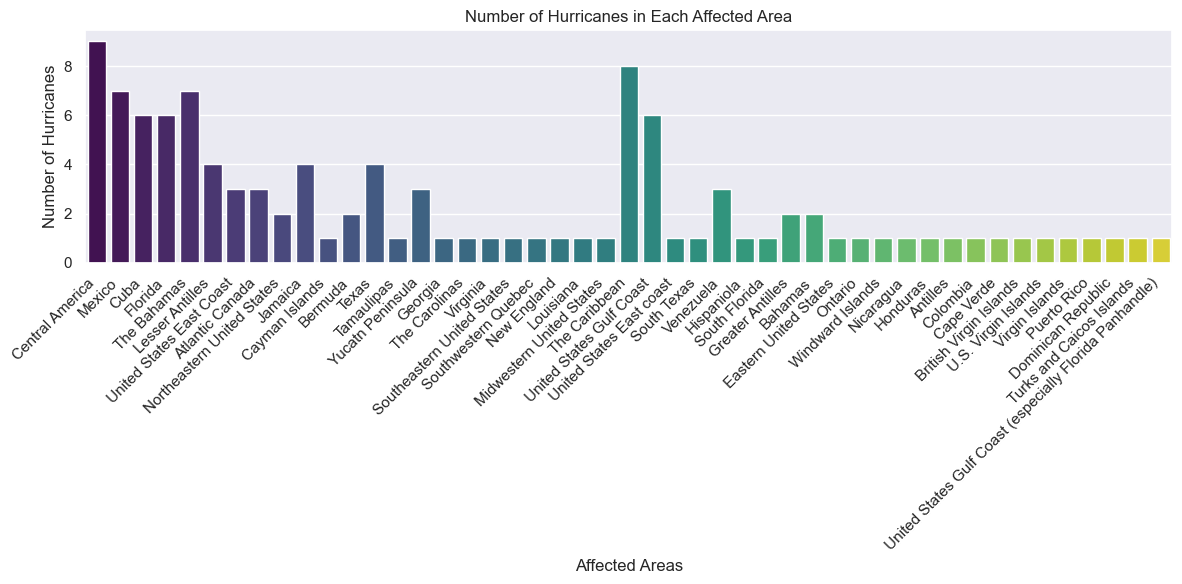

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count affected areas
def count_affected_areas(hurricanes):
    """Find the count of affected areas across all hurricanes and return as a dictionary with the affected areas as keys."""
    affected_areas_count = dict()
    for cane in hurricanes:
        for area in hurricanes[cane]['Areas Affected']:
            if area not in affected_areas_count:
                affected_areas_count[area] = 1
            else:
                affected_areas_count[area] += 1
    return affected_areas_count

# Create dictionary of areas to store the number of hurricanes involved in
affected_areas_count = count_affected_areas(hurricanes)
print(affected_areas_count)

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=list(affected_areas_count.keys()), y=list(affected_areas_count.values()), palette='viridis')

# Set plot labels and title
bar_plot.set(xlabel='Affected Areas', ylabel='Number of Hurricanes', title='Number of Hurricanes in Each Affected Area')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Write a function that finds the area affected by the most hurricanes, and how often it was hit.
Test your function on your affected area dictionary.

In [40]:
# 5
# Calculating Maximum Hurricane Count
def most_affected_area(affected_areas_count):
    """Find most affected area and the number of hurricanes it was involved in."""
    max_area = 'Central America'
    max_area_count = 0
    for area in affected_areas_count:
        if affected_areas_count[area] > max_area_count:
            max_area = area
            max_area_count = affected_areas_count[area]
    return max_area, max_area_count

# find most frequently affected area and the number of hurricanes involved in
max_area, max_area_count = most_affected_area(affected_areas_count)
print(max_area, max_area_count)

Central America 9


Write a function that finds the hurricane that caused the greatest number of deaths, and how many deaths it caused.

In [27]:
# 6
# Calculating the Deadliest Hurricane

# find highest mortality hurricane and the number of deaths

# 6
# Calculating the Deadliest Hurricane
def highest_mortality(hurricanes):
    """Find the highest mortality hurricane and the number of deaths it caused."""
    max_mortality_cane = 'Cuba I'
    max_mortality = 0
    for cane in hurricanes:
        if hurricanes[cane]['Deaths'] > max_mortality:
            max_mortality_cane = cane
            max_mortality = hurricanes[cane]['Deaths']
    return max_mortality_cane, max_mortality

# find highest mortality hurricane and the number of deaths
max_mortality_cane, max_mortality = highest_mortality(hurricanes)
print(max_mortality_cane, max_mortality)



Mitch 19325


Write a function that rates hurricanes on a mortality scale according to the following ratings, where the key is the rating and the value is the upper bound of deaths for that rating.

In [28]:
# 7
# Rating Hurricanes by Mortality
def categorize_by_mortality(hurricanes):
    """Categorize hurricanes by mortality and return a dictionary."""
    mortality_scale = {0: 0,
                      1: 100,
                      2: 500,
                      3: 1000,
                      4: 10000}
    hurricanes_by_mortality = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    for cane in hurricanes:
        num_deaths = hurricanes[cane]['Deaths']
        if num_deaths == mortality_scale[0]:
            hurricanes_by_mortality[0].append(hurricanes[cane])
        elif num_deaths > mortality_scale[0] and num_deaths <= mortality_scale[1]:
            hurricanes_by_mortality[1].append(hurricanes[cane])
        elif num_deaths > mortality_scale[1] and num_deaths <= mortality_scale[2]:
            hurricanes_by_mortality[2].append(hurricanes[cane])
        elif num_deaths > mortality_scale[2] and num_deaths <= mortality_scale[3]:
            hurricanes_by_mortality[3].append(hurricanes[cane])
        elif num_deaths > mortality_scale[3] and num_deaths <= mortality_scale[4]:
            hurricanes_by_mortality[4].append(hurricanes[cane])
        elif num_deaths > mortality_scale[4]:
            hurricanes_by_mortality[5].append(hurricanes[cane])
    return hurricanes_by_mortality

# categorize hurricanes in new dictionary with mortality severity as key
hurricanes_by_mortality = categorize_by_mortality(hurricanes)
print(hurricanes_by_mortality[5])

[{'Name': 'Mitch', 'Month': 'October', 'Year': 1998, 'Max Sustained Wind': 180, 'Areas Affected': ['Central America', 'Yucatn Peninsula', 'South Florida'], 'Damage': 6200000000.0, 'Deaths': 19325}]


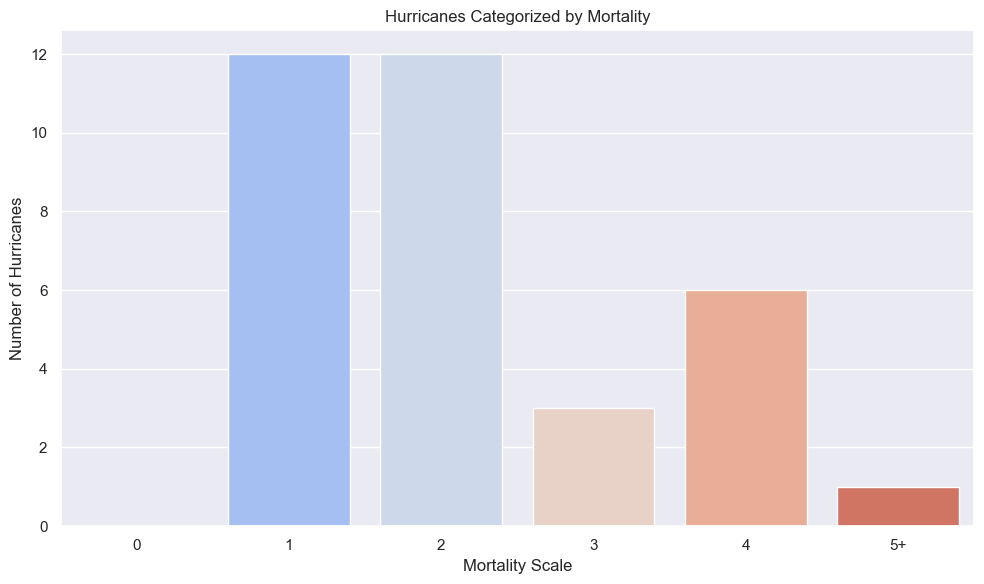

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize hurricanes by mortality
def categorize_by_mortality(hurricanes):
    """Categorize hurricanes by mortality and return a dictionary."""
    mortality_scale = {0: 0,
                      1: 100,
                      2: 500,
                      3: 1000,
                      4: 10000}
    hurricanes_by_mortality = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    for cane in hurricanes:
        num_deaths = hurricanes[cane]['Deaths']
        if num_deaths == mortality_scale[0]:
            hurricanes_by_mortality[0].append(hurricanes[cane])
        elif num_deaths > mortality_scale[0] and num_deaths <= mortality_scale[1]:
            hurricanes_by_mortality[1].append(hurricanes[cane])
        elif num_deaths > mortality_scale[1] and num_deaths <= mortality_scale[2]:
            hurricanes_by_mortality[2].append(hurricanes[cane])
        elif num_deaths > mortality_scale[2] and num_deaths <= mortality_scale[3]:
            hurricanes_by_mortality[3].append(hurricanes[cane])
        elif num_deaths > mortality_scale[3] and num_deaths <= mortality_scale[4]:
            hurricanes_by_mortality[4].append(hurricanes[cane])
        elif num_deaths > mortality_scale[4]:
            hurricanes_by_mortality[5].append(hurricanes[cane])
    return hurricanes_by_mortality

# Categorize hurricanes by mortality
hurricanes_by_mortality = categorize_by_mortality(hurricanes)

# Create a bar chart
mortality_counts = [len(hurricanes_by_mortality[i]) for i in range(6)]
mortality_labels = ['0', '1', '2', '3', '4', '5+']

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=mortality_labels, y=mortality_counts, palette='coolwarm')

# Set plot labels and title
bar_plot.set(xlabel='Mortality Scale', ylabel='Number of Hurricanes', title='Hurricanes Categorized by Mortality')

# Show the plot
plt.tight_layout()
plt.show()


Write a function that finds the hurricane that caused the greatest damage, and how costly it was.

In [29]:
# 8
# Calculating Hurricane Maximum Damage
def highest_damage(hurricanes):
    """Find the highest damage inducing hurricane and its total cost."""
    max_damage_cane = 'Cuba I'
    max_damage = 0
    for cane in hurricanes:
        if hurricanes[cane]['Damage'] == "Damages not recorded":
            pass
        elif hurricanes[cane]['Damage'] > max_damage:
            max_damage_cane = cane
            max_damage = hurricanes[cane]['Damage']
    return max_damage_cane, max_damage

# find highest damage inducing hurricane and its total cost
max_damage_cane, max_damage = highest_damage(hurricanes)
print(max_damage_cane, max_damage)


Katrina 125000000000.0


Write a function that rates hurricanes on a damage scale according to the following ratings, where the key is the rating and the value is the upper bound of damage for that rating.

In [30]:
# 9
# Rating Hurricanes by Damage
def categorize_by_damage(hurricanes):
    """Categorize hurricanes by damage and return a dictionary."""
    damage_scale = {0: 0,
                    1: 100000000,
                    2: 1000000000,
                    3: 10000000000,
                    4: 50000000000}
    hurricanes_by_damage = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    for cane in hurricanes:
        total_damage = hurricanes[cane]['Damage']
        if total_damage == "Damages not recorded":
            hurricanes_by_damage[0].append(hurricanes[cane])
        elif total_damage == damage_scale[0]:
            hurricanes_by_damage[0].append(hurricanes[cane])
        elif total_damage > damage_scale[0] and total_damage <= damage_scale[1]:
            hurricanes_by_damage[1].append(hurricanes[cane])
        elif total_damage > damage_scale[1] and total_damage <= damage_scale[2]:
            hurricanes_by_damage[2].append(hurricanes[cane])
        elif total_damage > damage_scale[2] and total_damage <= damage_scale[3]:
            hurricanes_by_damage[3].append(hurricanes[cane])
        elif total_damage > damage_scale[3] and total_damage <= damage_scale[4]:
            hurricanes_by_damage[4].append(hurricanes[cane])
        elif total_damage > damage_scale[4]:
            hurricanes_by_damage[5].append(hurricanes[cane])
    return hurricanes_by_damage

# categorize hurricanes in new dictionary with damage severity as key
hurricanes_by_damage = categorize_by_damage(hurricanes)
print(hurricanes_by_damage[5])


[{'Name': 'Katrina', 'Month': 'August', 'Year': 2005, 'Max Sustained Wind': 175, 'Areas Affected': ['Bahamas', 'United States Gulf Coast'], 'Damage': 125000000000.0, 'Deaths': 1836}, {'Name': 'Irma', 'Month': 'September', 'Year': 2017, 'Max Sustained Wind': 180, 'Areas Affected': ['Cape Verde', 'The Caribbean', 'British Virgin Islands', 'U.S. Virgin Islands', 'Cuba', 'Florida'], 'Damage': 64800000000.0, 'Deaths': 138}, {'Name': 'Maria', 'Month': 'September', 'Year': 2017, 'Max Sustained Wind': 175, 'Areas Affected': ['Lesser Antilles', 'Virgin Islands', 'Puerto Rico', 'Dominican Republic', 'Turks and Caicos Islands'], 'Damage': 91600000000.0, 'Deaths': 3057}]


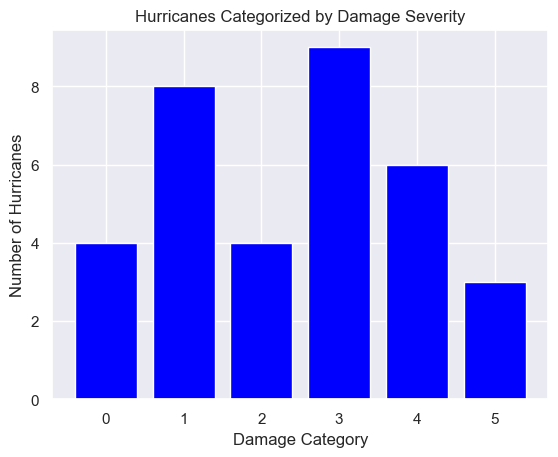

In [31]:
import matplotlib.pyplot as plt

# Plotting the bar graph
categories = ['0', '1', '2', '3', '4', '5']
counts = [len(hurricanes_by_damage[i]) for i in range(6)]

plt.bar(categories, counts, color='blue')
plt.xlabel('Damage Category')
plt.ylabel('Number of Hurricanes')
plt.title('Hurricanes Categorized by Damage Severity')
plt.show()

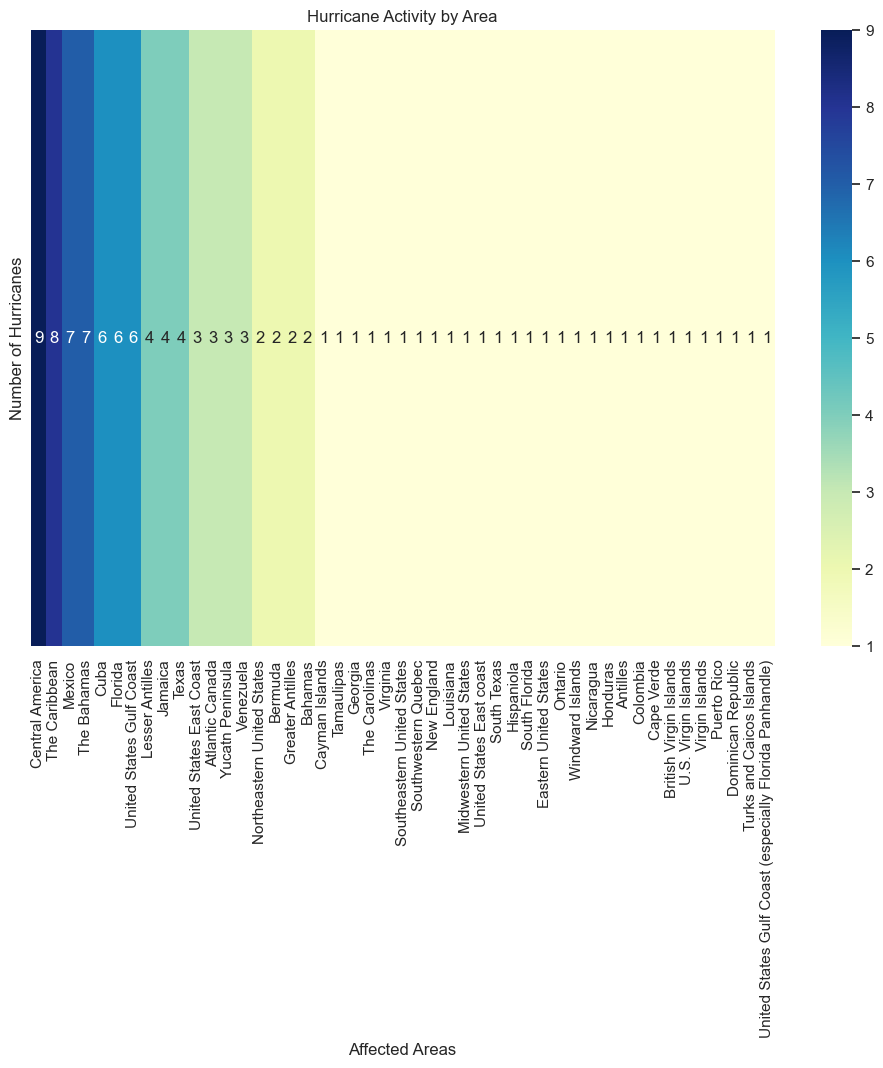

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'affected_areas_count' dictionary is available from previous code
# If not, run the code for counting affected areas (Step 4)

# Convert the affected_areas_count dictionary to a list of tuples for easier sorting
sorted_areas = sorted(affected_areas_count.items(), key=lambda x: x[1], reverse=True)

# Extract data for the heatmap
areas = [area[0] for area in sorted_areas]
counts = [area[1] for area in sorted_areas]

# Create a heatmap
sns.set()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data=[counts], cmap="YlGnBu", annot=True, fmt="d", xticklabels=areas, yticklabels=False)

# Set plot labels and title
heatmap.set(xlabel='Affected Areas', ylabel='Number of Hurricanes', title='Hurricane Activity by Area')

# Show the plot
plt.show()